In [231]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()
import io

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (2).csv


In [275]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [233]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


#EDA

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [235]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [236]:
df['ElecPrice'].max()

14700.0

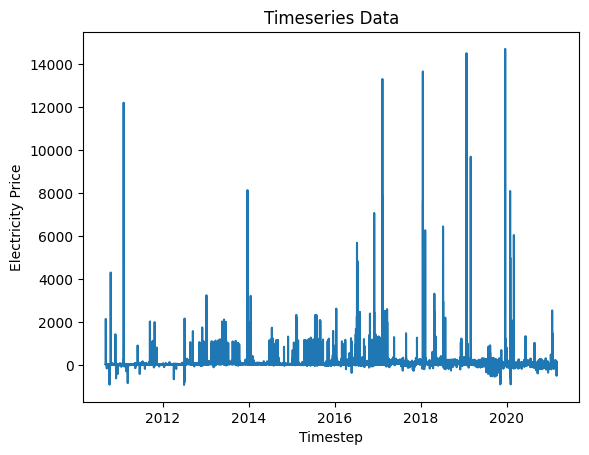

In [237]:
import matplotlib.pyplot as plt
df['FullDate'] = pd.to_datetime(df['FullDate'])

fig = plt.figure() # create a figure

ax = fig.add_subplot() # create axix

ax.plot(df['FullDate'], df['ElecPrice'])
ax.set_xlabel('Timestep')
ax.set_ylabel('Electricity Price')
ax.set_title('Timeseries Data')

plt.show()


[]

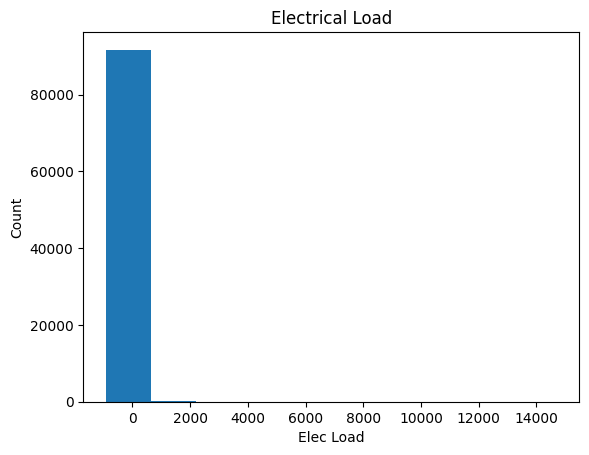

In [238]:
fig = plt.figure()

ax= fig.add_subplot()
ax.hist(df.ElecPrice)
ax.set_xlabel('Elec Load')
ax.set_ylabel('Count')
ax.set_title('Electrical Load')

plt.plot()

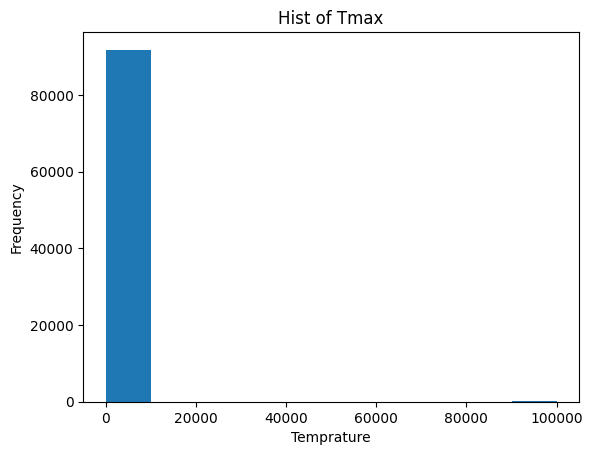

In [239]:
fig = plt.figure()
ax = fig.add_subplot()

ax.hist(df.Tmax)
ax.set_xlabel('Temprature')
ax.set_ylabel('Frequency')
ax.set_title('Hist of Tmax')

plt.show()

[]

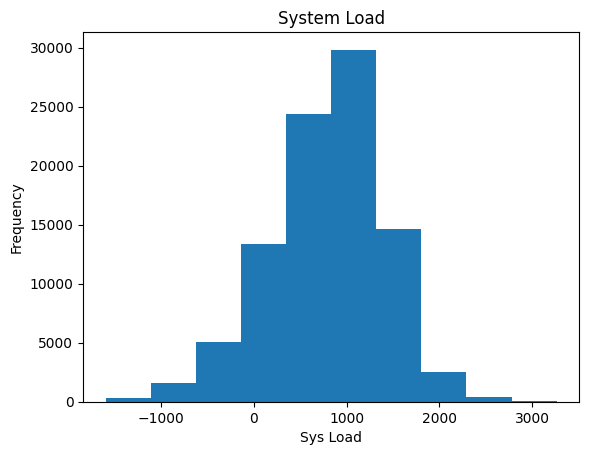

In [240]:
fig =  plt.figure()
ax = fig.add_subplot()

ax.hist(df.SysLoad)
ax.set_xlabel('Sys Load')
ax.set_ylabel('Frequency')
ax.set_title('System Load')
plt.plot()

[]

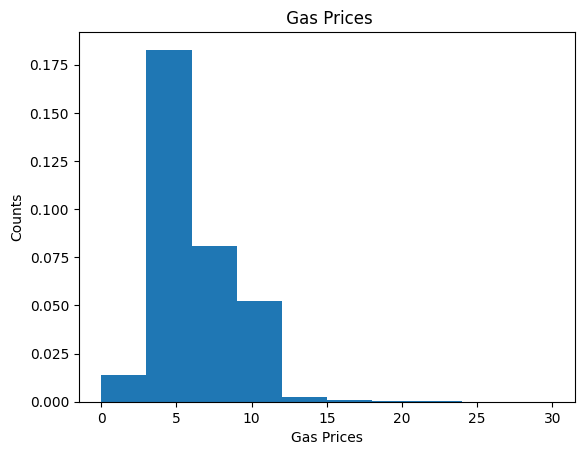

In [241]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(df.GasPrice, density = True)

ax.set_xlabel('Gas Prices')
ax.set_ylabel('Counts')
ax.set_title(' Gas Prices')

plt.plot()

In [242]:
condition = df['ElecPrice'] > 10000
greater_10k = df[condition]
greater_10k

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
3662,2011-01-31 14:00:00,42.9,3134.04525,3.200,12049.305
3663,2011-01-31 15:00:00,42.9,3192.73040,3.200,12199.115
3664,2011-01-31 16:00:00,42.9,3264.16630,3.200,12157.615
3665,2011-01-31 17:00:00,42.9,3243.82870,3.200,12073.990
56466,2017-02-08 18:00:00,42.4,2900.03120,10.390,13300.010
56467,2017-02-08 19:00:00,42.4,2831.49875,10.390,11393.695
64721,2018-01-18 17:00:00,42.8,2307.15015,9.169,13651.295
73624,2019-01-24 16:00:00,47.7,1811.00200,13.230,13277.455
73625,2019-01-24 17:00:00,47.7,2135.85465,13.230,13762.295
73626,2019-01-24 18:00:00,47.7,2290.34110,13.230,14500.000


In [243]:
len(greater_10k)

13

In [244]:
df.corr()

<ipython-input-244-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [245]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [246]:
drop_temp = df[df['Tmax']> 9000]
drop_temp

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
12720,2012-02-13 00:00:00,99999.9,1049.05930,3.52,21.535
12721,2012-02-13 01:00:00,99999.9,1061.20080,3.52,19.270
12722,2012-02-13 02:00:00,99999.9,882.04805,3.52,15.855
12723,2012-02-13 03:00:00,99999.9,793.06940,3.52,13.775
12724,2012-02-13 04:00:00,99999.9,774.63780,3.52,15.120
...,...,...,...,...,...
78259,2019-08-05 19:00:00,99999.9,1517.35715,9.00,196.775
78260,2019-08-05 20:00:00,99999.9,1448.34000,9.00,109.170
78261,2019-08-05 21:00:00,99999.9,1215.92505,9.00,90.740
78262,2019-08-05 22:00:00,99999.9,998.04910,9.00,89.060


##Mean Elec Price

In [247]:
elec_drop = df[df['ElecPrice'] > 200]
len(elec_drop)

1750

In [248]:
df.ElecPrice.mean()# meanelec price after removing outliers

65.7983564271431

###Mean Temp

In [249]:
# to filter create boolan mask and grab indes to feed to drop()
df_1 = df.drop(drop_temp.index, axis = 0)
df_1.Tmax.mean()

23.085703084161004

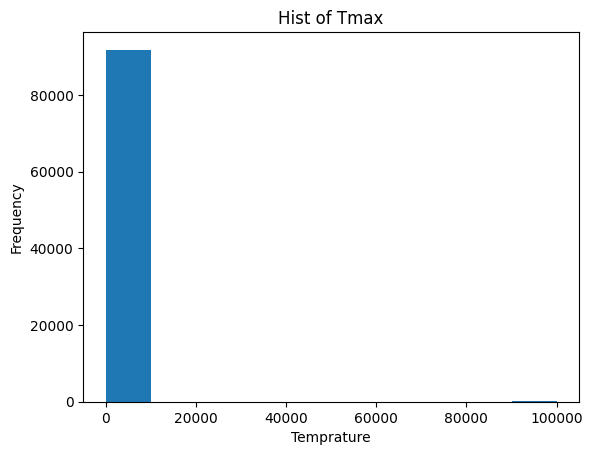

In [250]:
fig = plt.figure()
ax = fig.add_subplot()

ax.hist(df.Tmax)
ax.set_xlabel('Temprature')
ax.set_ylabel('Frequency')
ax.set_title('Hist of Tmax')

plt.show()

In [251]:
df_2 = df.drop(elec_drop.index, inplace = True)

[]

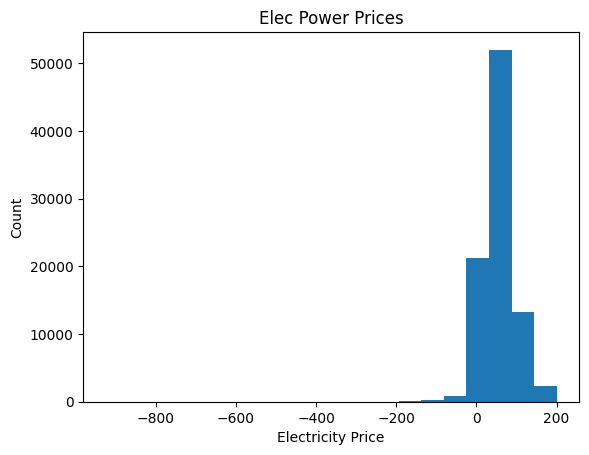

In [252]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(df.ElecPrice, bins = 20)

ax.set_xlabel('Electricity Price')
ax.set_ylabel('Count')
ax.set_title('Elec Power Prices')

plt.plot()

## Replacing outliers with the mean

In [253]:
# Average Temprature

df['Tmax'] = df['Tmax'].apply(lambda x: 23.08 if x > 50 else x)

In [254]:
# Elec Price

df['ElecPrice'] = df['ElecPrice'].apply(lambda x: 65.8 if x > 200 else x)

In [255]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [256]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,90266.000000,90266.000000,90266.000000,90266.000000
mean,23.042870,784.517058,5.951726,54.466741
std,6.923037,607.225986,2.527434,41.320505
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,407.899262,3.929900,31.200000
50%,21.900000,845.492375,5.118900,48.045000
75%,27.500000,1207.426875,7.990000,73.872500
max,47.700000,3017.265600,29.990000,199.990000


In [283]:

#12
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming you have a DataFrame called 'df' with columns 'SysLoad' and 'GasPrice'

# Perform ADF test on 'SysLoad' feature
result_sysload = adfuller(df['SysLoad'])
p_value_sysload = result_sysload[1]

# Perform ADF test on 'GasPrice' feature
result_gasprice = adfuller(df['GasPrice'])
p_value_gasprice = result_gasprice[1]

# Print the P-values to 6 decimal places
print("P-value for SysLoad:", round(p_value_sysload, 20))
print("P-value for GasPrice:", round(p_value_gasprice, 20))


P-value for SysLoad: 0.0
P-value for GasPrice: 2.33376053436e-09


In [273]:
#13
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming you have a DataFrame called 'df' with columns 'GasPrice' and 'ElecPrice'

# Perform ADF test on 'GasPrice' feature
result_gasprice = adfuller(df['GasPrice'])
critical_values_gasprice = result_gasprice[4]

# Perform ADF test on 'ElecPrice' feature
result_elecprice = adfuller(df['ElecPrice'])
critical_values_elecprice = result_elecprice[4]

# Print the critical values at 10% and 5% significance levels to 4 decimal places
print("10% Critical Value for GasPrice:", round(critical_values_gasprice['10%'], 4))
print("5% Critical Value for GasPrice:", round(critical_values_gasprice['5%'], 4))

print("10% Critical Value for ElecPrice:", round(critical_values_elecprice['10%'], 4))
print("5% Critical Value for ElecPrice:", round(critical_values_elecprice['5%'], 4))


10% Critical Value for GasPrice: -2.5668
5% Critical Value for GasPrice: -2.8616
10% Critical Value for ElecPrice: -2.5668
5% Critical Value for ElecPrice: -2.8616


#Modelling

##Convert Data to Numerical Variable and Normalise

In [257]:
# @title
# # DataTime Conversion to Numberical Data
# # convert datetime to numerical representation understnadable by a computer, unix ti estap format
# df['FullDate'] = pd.to_datetime(df['FullDate'].astype(int))

# # scaling time since it is in nanseconds
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler()
# df['FullDate'] = scaling.fit_transform(df[['FullDate']])

In [258]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [259]:
# from statsmodels.tsa.arima.model import ARIMA
# target = df['ElecPrice']
# n = 20 # No of Prices to Predict
# model = ARIMA(target, order = (3,2,1))
# results = model.fit()

# # Predictions
# predictions = results.predict(start = len(target), end = len(target)+ n -1, typ = 'levels')

# # Plot Results
# plt.plot(target.index, target, label = 'Original Data')
# plt.plot(predictions.index, predictions, label = 'Model Predictions')
# plt.legend()
# plt.plot()

In [260]:
# @title
# # @title
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Assuming you have a pandas DataFrame with a 'Date' index and 5 features columns
# # Replace 'your_dataframe' with your actual DataFrame name
# data = df.values

# # Normalize data
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

# # Save Model
# current_epoch = 0
# # Create sequences for LSTM
# seq_length = 10
# X = []
# y = []

# # for i in range(len(data) - seq_length):
# #   X.append(data[i:i+seq_length, :-1])  # Use all features except the last column (Energy Price) as input
# #   y.append(data[i+seq_length, -1])    # Use only the last column (Energy Price) as the target


# for i in range(len(data_scaled) - seq_length):
#     seq = data_scaled[i:i+seq_length, :-1]
#     seq = seq.reshape(seq_length, -1)
#     X.append(seq)
#     y.append(data_scaled[i+seq_length, -1])
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define LSTM model
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         lstm_out, _ = self.lstm(x)
#         output = self.fc(lstm_out[:, -1, :])
#         return output

# # Initialize model and set hyperparameters
# input_size = X_train.shape[2]  # Number of input features (4 in your case, excluding Energy Price)
# hidden_size = 50
# output_size = 1  # Output size is 1, as you're predicting a single value (Energy Price)

# model_lstm = LSTMModel(input_size, hidden_size, output_size)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

# # Train LSTM model
# num_epochs = 100
# batch_size = 32
# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# try:
#   for epoch in range(current_epoch, num_epochs):
#       for inputs, targets in train_loader:
#           optimizer.zero_grad()
#           outputs = model_lstm(inputs)
#           loss = criterion(outputs, targets.unsqueeze(1))  # Need to reshape the targets to match the output size
#           loss.backward()
#           optimizer.step()
#       current_epoch = epoch + 1
# except Exception as e:
#   print('Error Occured During Traing')
#   # Save Checkpoint
#   check_point = {
#       'epoch' : current_epoch,
#       'model_state_dict': model_lstm.state_dict(),
#       'optimizer_state-dict': optimizer.state_dict(),
#       'loss': loss.item()
#   }
#   # with files.open{}
#   file_path = '/content/check_point.pth'
#   torch.save(check_point, file_path)

# # Make predictions
# model_lstm.eval()
# with torch.no_grad():
#     predictions_lstm = model_lstm(X_test)

# # # Inverse transform predictions to get the actual values
# # predictions_lstm_actual = scaler.inverse_transform(predictions_lstm.numpy().squeeze())
# # Reshape the predictions_lstm tensor to (batch_size, output_size) using reshape()
# # Reshape to (batch_size, num_features)

# predictions_lstm_reshaped = predictions_lstm.reshape(-1, X_train.shape[2])

# # Inverse transform predictions to get the actual values
# predictions_lstm_actual = scaler.inverse_transform(predictions_lstm_reshaped.numpy())




# # Plot results
# plt.plot(y_test.numpy(), label='True Values (Energy Price)')
# plt.plot(predictions_lstm_actual, label='LSTM Predictions (Energy Price)')
# plt.legend()
# plt.show()


# Modelling

### Dividing Dataset

In [261]:
df['FullDate'] = pd.to_datetime(df['FullDate'])

# Set 'FullDate' as the DataFrame index
df.set_index('FullDate', inplace=True)

# Resample the data on a daily basis and sum the values for each day
daily_df = df.resample('D').sum()

# Extract the train and test sets based on the specified split point (2757 days)
train_set = daily_df.iloc[:2757]
test_set = daily_df.iloc[2757:]

# Print the first few rows of the train and test sets
print("Train Set:")
print(train_set.head())

print("\nTest Set:")
print(test_set.head())

Train Set:
             Tmax    SysLoad  GasPrice  ElecPrice
FullDate                                         
2010-09-01  363.4  39557.790     84.87    608.705
2010-09-02  369.6  38898.990     88.56    570.810
2010-09-03  439.2  41665.760    106.80    504.975
2010-09-04  328.8  35638.085     81.36    502.275
2010-09-05  357.6  35611.410    106.80    500.555

Test Set:
             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2018-03-20  540.0   7696.91130  201.5880    1833.00
2018-03-21  571.2   4658.05865  203.2560    1730.49
2018-03-22  722.4  19161.78525  203.2560    2260.55
2018-03-23  811.2  18090.43435  198.6456    2138.76
2018-03-24  832.8   3763.53865  180.2160    1721.70


In [279]:
daily_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,363.4,39557.79000,84.8700,608.705
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


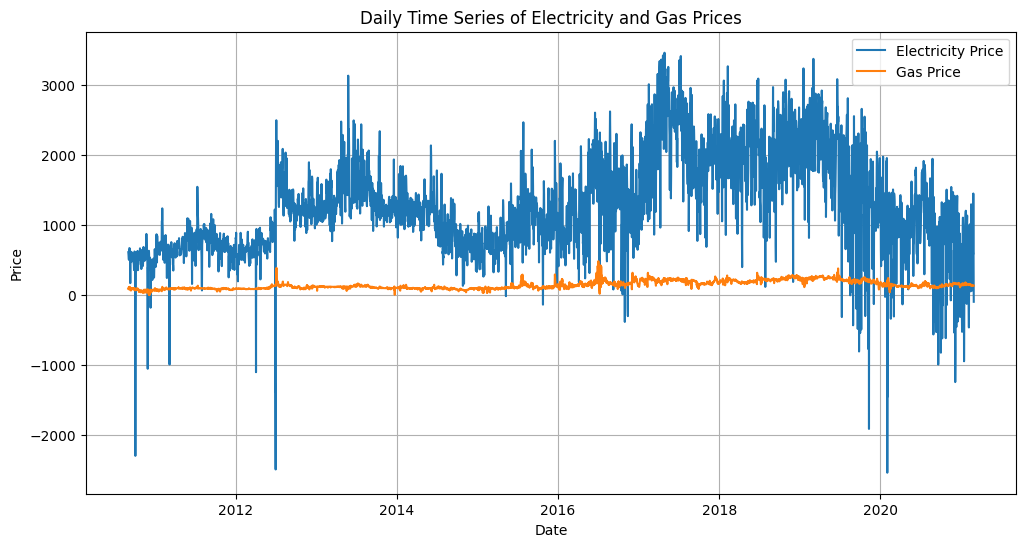

In [281]:
# 11
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already performed the operations mentioned above

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['ElecPrice'], label='Electricity Price')
plt.plot(daily_df.index, daily_df['GasPrice'], label='Gas Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Time Series of Electricity and Gas Prices')
plt.legend()
plt.grid(True)
plt.show()


In [262]:
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,363.4,39557.790,84.87,608.705
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [263]:
print('len daily', len(daily_df))
print('len train_set', len(train_set))
print('len test_set', len(test_set))

len daily 3834
len train_set 2757
len test_set 1077


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps16rzs9s/ml0mdt_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps16rzs9s/x_ssygwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71434', 'data', 'file=/tmp/tmps16rzs9s/ml0mdt_z.json', 'init=/tmp/tmps16rzs9s/x_ssygwe.json', 'output', 'file=/tmp/tmps16rzs9s/prophet_model9c3mh11g/prophet_model-20230801051154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


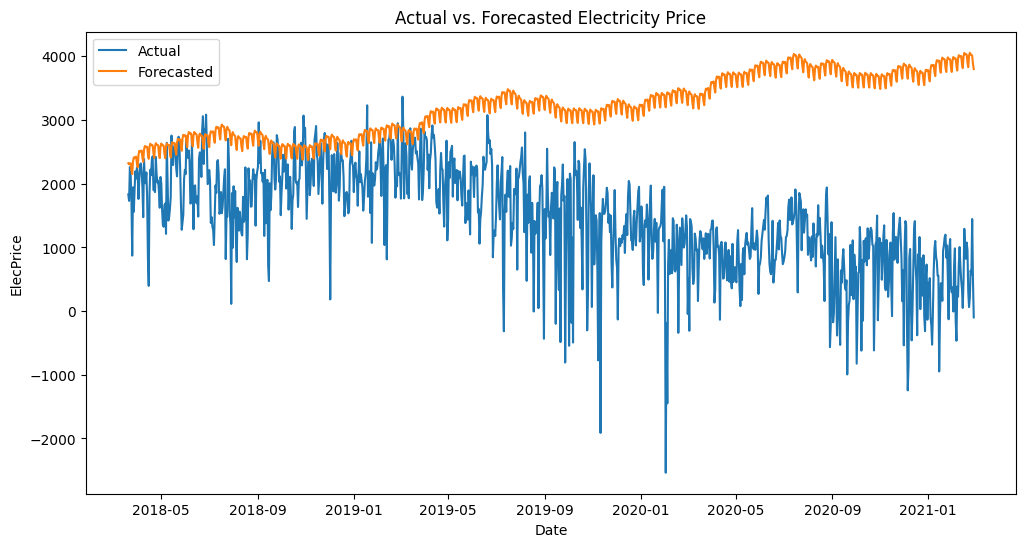

Mean Absolute Error (MAE): 1756.487431167239
Mean Squared Error (MSE): 4404638.769270571
Root Mean Squared Error (RMSE): 2098.7231283021997


In [264]:
#14-16


# Prepare data in required format for Prophet
prophet_train_df = train_set.reset_index().rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

# Create Prophet model and fit it to the train set
model = Prophet()
model.fit(prophet_train_df)

# Make future projections for the test set
future = model.make_future_dataframe(periods=len(test_set), freq='D')
forecast = model.predict(future)

# Extract the forecasted values for the test set
forecast_test = forecast.iloc[-len(test_set):]

# Plot the actual and forecasted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set['ElecPrice'], label='Actual')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecasted')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Actual vs. Forecasted Electricity Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the actual and forecasted values for the test set
y_actual = test_set['ElecPrice']
y_forecasted = forecast_test['yhat']

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_forecasted)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_forecasted)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)





In [265]:
# Prepare data in required format for Prophet (including additional regressors)
prophet_train_df = train_set.reset_index().rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})
prophet_train_df['temp'] = train_set['Tmax'].values
prophet_train_df['load'] = train_set['SysLoad'].values
prophet_train_df['gas_price'] = train_set['GasPrice'].values

In [266]:
print('len train temp: ', len(train_set['Tmax']))
print('len train load: ', len(train_set['SysLoad']))
print('len train gas price: ', len(train_set['GasPrice']))

len train temp:  2757
len train load:  2757
len train gas price:  2757


In [267]:
# Create Prophet model with additional regressors and fit it to the train set
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.add_regressor('temp')
model.add_regressor('load')
model.add_regressor('gas_price')
model.fit(prophet_train_df)

# Prepare the test data with regressors for forecasting
prophet_test_df = test_set.reset_index().rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})
prophet_test_df['temp'] = test_set['Tmax'].values
prophet_test_df['load'] = test_set['SysLoad'].values
prophet_test_df['gas_price'] = test_set['GasPrice'].values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps16rzs9s/91fdvjqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps16rzs9s/lwpugsy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65256', 'data', 'file=/tmp/tmps16rzs9s/91fdvjqd.json', 'init=/tmp/tmps16rzs9s/lwpugsy4.json', 'output', 'file=/tmp/tmps16rzs9s/prophet_modelund_5m8h/prophet_model-20230801051158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [268]:
print('len test temp: ', len(test_set['Tmax']))
print('len test load: ', len(test_set['SysLoad']))
print('len test gas price: ', len(test_set['GasPrice']))

len test temp:  1077
len test load:  1077
len test gas price:  1077


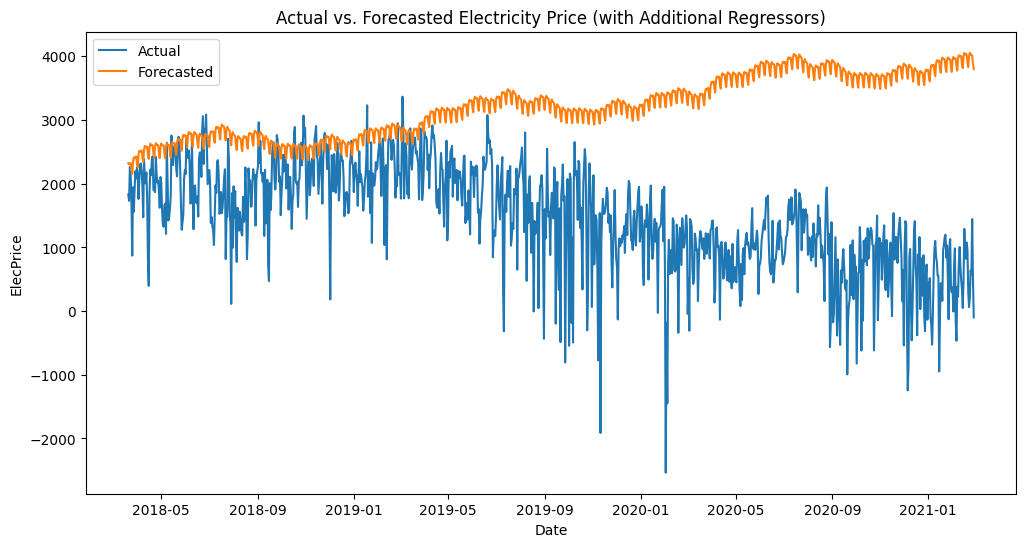

Mean Absolute Percentage Error (MAPE): nan
Mean Absolute Error (MAE): 1756.487431167239
Mean Squared Error (MSE): 4404638.769270571
Root Mean Squared Error (RMSE): 2098.7231283021997


<ipython-input-282-27a0a9b76173>:37: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_actual - y_forecasted) / y_actual)) * 100


In [282]:
# 20
# Step 1: Create a 'future' DataFrame for the test set
future = model.make_future_dataframe(periods=len(test_set), freq='D')

# Step 2: Add additional regressors from 'prophet_test_df' to the 'future' DataFrame
future['temp'] = prophet_test_df['temp'].iloc[:len(future)]
future['load'] = prophet_test_df['load'].iloc[:len(future)]
future['gas_price'] = prophet_test_df['gas_price'].iloc[:len(future)]


# Step 3: Extract the forecasted values for the test set
forecast_test = forecast.iloc[-len(test_set):]

# Step 4: Plot the actual and forecasted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set['ElecPrice'], label='Actual')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecasted')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Actual vs. Forecasted Electricity Price (with Additional Regressors)')
plt.legend()
plt.show()

# Calculate the actual and forecasted values for the test set
y_actual = test_set['ElecPrice']
y_forecasted = forecast_test['yhat']

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_forecasted)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_forecasted)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_actual - y_forecasted) / y_actual)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
